## Importing libraries & loading files

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [2]:
df_matches = pd.read_csv('data/matches_df_final.csv', low_memory=False) ###
df_players = pd.read_csv('data/cleaned_players_dataset_final.csv')

In [3]:
df_matches.head()

,player_A,player_B,target,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,P_A_B365,P_B_B365,P_A_EX,P_B_EX,P_A_LB,P_B_LB,P_A_PS,P_B_PS,P_A_SJ,P_B_SJ,P_A_Max,P_B_Max,P_A_Avg,P_B_Avg,player_A_full,player_B_full
0,Giraldo S.,Mayer F.,0,1,Brisbane,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,28.0,57.0,1215.0,778.0,6.0,4.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,3.00,1.36,2.65,1.45,2.62,1.44,2.85,1.47,2.63,1.44,3.20,1.47,2.78,1.42,Santiago Giraldo,Florian Mayer
1,Hanescu V.,Davydenko N.,0,3,Doha,Qatar Exxon Mobil Open,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,44.0,62.0,885.0,753.0,6.0,2.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,3.25,1.33,3.0,1.35,3.00,1.36,3.92,1.29,3.00,1.33,3.92,1.38,3.21,1.33,Victor Hănescu,Nikolay Davydenko
2,Zemlja G.,Fognini F.,1,3,Doha,Qatar Exxon Mobil Open,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,55.0,45.0,782.0,880.0,6.0,2.0,3.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,1.57,2.25,1.65,2.15,1.67,2.10,1.73,2.22,1.67,2.10,1.73,2.40,1.63,2.21,Grega Zemlja,Fabio Fognini
3,Troicki V.,Phau B.,1,3,Doha,Qatar Exxon Mobil Open,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,38.0,75.0,1055.0,668.0,6.0,3.0,3.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,1.36,3.00,1.35,3.00,1.33,3.25,1.38,3.26,1.44,2.63,1.48,3.95,1.40,2.87,Viktor Troicki,Bjorn Phau
4,Kohlschreiber P.,Dodig I.,1,3,Doha,Qatar Exxon Mobil Open,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,20.0,72.0,1770.0,695.0,7.0,6.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,1.44,2.62,1.5,2.50,1.50,2.50,1.54,2.63,1.50,2.50,1.57,3.00,1.50,2.52,Philipp Kohlschreiber,Ivan Dodig


In [4]:
df_players.head()

,name,Age,Country,Birthplace,Residence,Height,Weight,Plays,Backhand,Favorite Surface,Coach,Turned Pro,Seasons,Active,Retired,Prize Money,Titles,Grand Slams,Tour Finals,Masters,Olympics,Davis Cups,Team Cups,Current Rank,Best Rank,Current Elo Rank,Best Elo Rank,Peak Elo Rating,GOAT Rank,Weeks at No. 1,Best Season,Overall Win %,Hard Win %,Clay Win %,Grass Win %,Carpet Win %,H2H Wins,H2H Draws,H2H Losses,H2H %
0,Florian Mayer,41.0,Germany,NaN,NaN,190 cm,NaN,Right-handed,Two-handed,Grass 28%,NaN,2001.0,15.0,NaN,2018.0,"US$7,278,992",2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,18 (06-06-2011),NaN,22 (14-11-2011),2044 (14-11-2011),286 (7),NaN,2011.0,48.2,NaN,50.0,59.4,NaN,18.0,6.0,39.0,33.3
1,Santiago Giraldo,37.0,Colombia,NaN,NaN,188 cm,NaN,Right-handed,Two-handed,Clay 22%,NaN,2006.0,15.0,NaN,2019.0,"$4,541,251",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28 (29-09-2014),NaN,32 (11-05-2014),1970 (10-06-2012),647 (1),NaN,2014.0,44.7,NaN,NaN,NaN,NaN,10.0,6.0,31.0,27.7
2,Nikolay Davydenko,44.0,Russian Federation,NaN,NaN,178 cm,NaN,Right-handed,Two-handed,Carpet 52%,NaN,1999.0,15.0,NaN,2014.0,"US$16,186,480 35th all-time leader in earnings",21.0,NaN,1.0,3.0,NaN,1.0,NaN,NaN,3 (06-11-2006),NaN,5 (21-04-2008),2291 (01-02-2010),52 (76),NaN,2006.0,59.4,59.4,61.1,NaN,65.4,68.0,9.0,33.0,65.9
3,Victor Hănescu,43.0,Romania,NaN,NaN,198 cm,NaN,Right-handed,One-handed,Clay 37%,NaN,1999.0,14.0,NaN,2015.0,"$4,297,051",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 (06-07-2009),NaN,41 (20-06-2010),1958 (07-06-2010),486 (2),NaN,2008.0,45.2,NaN,54.2,NaN,NaN,13.0,6.0,41.0,26.7
4,Fabio Fognini,38.0,Italy,NaN,NaN,178 cm,NaN,Right-handed,Two-handed,Clay 20%,NaN,2004.0,20.0,Yes,NaN,"US$16,673,573 34th all-time leader in earnings",9.0,NaN,NaN,1.0,NaN,NaN,NaN,91 (637),9 (15-07-2019),89 (1833),14 (11-04-2014),2112 (20-04-2014),167 (18),NaN,2019.0,52.3,46.2,57.2,NaN,NaN,41.0,12.0,48.0,46.5


## Merging the datasets

In [ ]:
# Clean up the 'name' columns for consistency (remove trailing spaces, accents, etc.)
df_players['name'] = df_players['name'].str.strip()

# Merge player_A info
df_merged = df_matches.merge(
    df_players.add_prefix('A_'),
    left_on='player_A_full',
    right_on='A_name',
    how='left'
)

# Merge player_B info
df_merged = df_merged.merge(
    df_players.add_prefix('B_'),
    left_on='player_B_full',
    right_on='B_name',
    how='left'
)

# Feature engineering
# Age difference (positive = player_A older)
df_merged['age_diff'] = df_merged['A_Age'] - df_merged['B_Age']

# Height difference (convert to cm numeric)
df_merged['A_Height'] = df_merged['A_Height'].str.extract('(\d+)').astype(float)
df_merged['B_Height'] = df_merged['B_Height'].str.extract('(\d+)').astype(float)
df_merged['height_diff'] = df_merged['A_Height'] - df_merged['B_Height']

# Weight difference (sometimes missing, so careful)
df_merged['A_Weight'] = df_merged['A_Weight'].str.extract('(\d+)').astype(float)
df_merged['B_Weight'] = df_merged['B_Weight'].str.extract('(\d+)').astype(float)
df_merged['weight_diff'] = df_merged['A_Weight'] - df_merged['B_Weight']

# Home advantage: if player country matches tournament location
# You might need to adjust 'Location' or map tournament to country
df_merged['player_A_home'] = df_merged['A_Country'] == df_merged['Location']
df_merged['player_B_home'] = df_merged['B_Country'] == df_merged['Location']

# Difference in Best Rank (positive = player_A higher ranked historically)
df_merged['A_Best_Rank'] = df_merged['A_Best Rank'].str.extract('(\d+)').astype(float)
df_merged['B_Best_Rank'] = df_merged['B_Best Rank'].str.extract('(\d+)').astype(float)
df_merged['rank_diff'] = df_merged['B_Best_Rank'] - df_merged['A_Best_Rank']

# Elo rating difference (can be useful if available)
df_merged['A_Best_Elo'] = df_merged['A_Best Elo Rank'].str.extract('(\d+)').astype(float)
df_merged['B_Best_Elo'] = df_merged['B_Best Elo Rank'].str.extract('(\d+)').astype(float)
df_merged['elo_diff'] = df_merged['B_Best_Elo'] - df_merged['A_Best_Elo']

# Plays style indicators
df_merged['A_Lefty'] = df_merged['A_Plays'].str.contains('Left', case=False, na=False).astype(int)
df_merged['B_Lefty'] = df_merged['B_Plays'].str.contains('Left', case=False, na=False).astype(int)
df_merged['lefty_diff'] = df_merged['A_Lefty'] - df_merged['B_Lefty']

# Preferred surface match indicator (basic version)
# Preferred surface match indicator (row by row comparison)
df_merged['A_Prefers_Surface'] = df_merged.apply(
    lambda row: str(row['Surface']).lower() in str(row['A_Favorite Surface']).lower() if pd.notnull(row['A_Favorite Surface']) else False,
    axis=1
)

df_merged['B_Prefers_Surface'] = df_merged.apply(
    lambda row: str(row['Surface']).lower() in str(row['B_Favorite Surface']).lower() if pd.notnull(row['B_Favorite Surface']) else False,
    axis=1
)

# Other win % differences (if available)
df_merged['win_percent_diff'] = df_merged['A_Overall Win %'] - df_merged['B_Overall Win %']

# You can also add:
# Clay win diff, Hard win diff, Grass win diff, etc., if the columns exist:
df_merged['hard_win_diff'] = df_merged['A_Hard Win %'] - df_merged['B_Hard Win %']
df_merged['clay_win_diff'] = df_merged['A_Clay Win %'] - df_merged['B_Clay Win %']
df_merged['grass_win_diff'] = df_merged['A_Grass Win %'] - df_merged['B_Grass Win %']

# Final cleaning - drop redundant columns if needed
df_merged = df_merged.drop(columns=['A_name', 'B_name'])

In [6]:
df_merged.head()

,player_A,player_B,target,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,P_A_B365,P_B_B365,P_A_EX,P_B_EX,P_A_LB,P_B_LB,P_A_PS,P_B_PS,P_A_SJ,P_B_SJ,P_A_Max,P_B_Max,P_A_Avg,P_B_Avg,player_A_full,player_B_full,A_Age,A_Country,A_Birthplace,A_Residence,A_Height,A_Weight,A_Plays,A_Backhand,A_Favorite Surface,A_Coach,A_Turned Pro,A_Seasons,A_Active,A_Retired,A_Prize Money,A_Titles,A_Grand Slams,A_Tour Finals,A_Masters,A_Olympics,A_Davis Cups,A_Team Cups,A_Current Rank,A_Best Rank,A_Current Elo Rank,A_Best Elo Rank,A_Peak Elo Rating,A_GOAT Rank,A_Weeks at No. 1,A_Best Season,A_Overall Win %,A_Hard Win %,A_Clay Win %,A_Grass Win %,A_Carpet Win %,A_H2H Wins,A_H2H Draws,A_H2H Losses,A_H2H %,B_Age,B_Country,B_Birthplace,B_Residence,B_Height,B_Weight,B_Plays,B_Backhand,B_Favorite Surface,B_Coach,B_Turned Pro,B_Seasons,B_Active,B_Retired,B_Prize Money,B_Titles,B_Grand Slams,B_Tour Finals,B_Masters,B_Olympics,B_Davis Cups,B_Team Cups,B_Current Rank,B_Best Rank,B_Current Elo Rank,B_Best Elo Rank,B_Peak Elo Rating,B_GOAT Rank,B_Weeks at No. 1,B_Best Season,B_Overall Win %,B_Hard Win %,B_Clay Win %,B_Grass Win %,B_Carpet Win %,B_H2H Wins,B_H2H Draws,B_H2H Losses,B_H2H %,age_diff,height_diff,weight_diff,player_A_home,player_B_home,A_Best_Rank,B_Best_Rank,rank_diff,A_Best_Elo,B_Best_Elo,elo_diff,A_Lefty,B_Lefty,lefty_diff,A_Prefers_Surface,B_Prefers_Surface,win_percent_diff,hard_win_diff,clay_win_diff,grass_win_diff
0,Giraldo S.,Mayer F.,0,1,Brisbane,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,28.0,57.0,1215.0,778.0,6.0,4.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,3.00,1.36,2.65,1.45,2.62,1.44,2.85,1.47,2.63,1.44,3.20,1.47,2.78,1.42,Santiago Giraldo,Florian Mayer,37.0,Colombia,NaN,NaN,188.0,NaN,Right-handed,Two-handed,Clay 22%,NaN,2006.0,15.0,NaN,2019.0,"$4,541,251",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28 (29-09-2014),NaN,32 (11-05-2014),1970 (10-06-2012),647 (1),NaN,2014.0,44.7,NaN,NaN,NaN,NaN,10.0,6.0,31.0,27.7,41.0,Germany,NaN,NaN,190.0,NaN,Right-handed,Two-handed,Grass 28%,NaN,2001.0,15.0,NaN,2018.0,"US$7,278,992",2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,18 (06-06-2011),NaN,22 (14-11-2011),2044 (14-11-2011),286 (7),NaN,2011.0,48.2,NaN,50.0,59.4,NaN,18.0,6.0,39.0,33.3,-4.0,-2.0,NaN,False,False,28.0,18.0,-10.0,32.0,22.0,-10.0,0,0,0,False,False,-3.5,NaN,NaN,NaN
1,Hanescu V.,Davydenko N.,0,3,Doha,Qatar Exxon Mobil Open,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,44.0,62.0,885.0,753.0,6.0,2.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,3.25,1.33,3.0,1.35,3.00,1.36,3.92,1.29,3.00,1.33,3.92,1.38,3.21,1.33,Victor Hănescu,Nikolay Davydenko,43.0,Romania,NaN,NaN,198.0,NaN,Right-handed,One-handed,Clay 37%,NaN,1999.0,14.0,NaN,2015.0,"$4,297,051",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 (06-07-2009),NaN,41 (20-06-2010),1958 (07-06-2010),486 (2),NaN,2008.0,45.2,NaN,54.2,NaN,NaN,13.0,6.0,41.0,26.7,44.0,Russian Federation,NaN,NaN,178.0,NaN,Right-handed,Two-handed,Carpet 52%,NaN,1999.0,15.0,NaN,2014.0,"US$16,186,480 35th all-time leader in earnings",21.0,NaN,1.0,3.0,NaN,1.0,NaN,NaN,3 (06-11-2006),NaN,5 (21-04-2008),2291 (01-02-2010),52 (76),NaN,2006.0,59.4,59.4,61.1,NaN,65.4,68.0,9.0,33.0,65.9,-1.0,20.0,NaN,False,False,26.0,3.0,-23.0,41.0,5.0,-36.0,0,0,0,False,False,-14.2,NaN,-6.9,NaN
2,Zemlja G.,Fognini F.,1,3,Doha,Qatar Exxon Mobil Open,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,55.0,45.0,782.0,880.0,6.0,2.0,3.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,1.57,2.25,1.65,2.15,1.67,2.10,1.73,2.22,1.67,2.10,1.73,2.40,1.63,2.21,Grega Zemlja,Fabio Fognini,38.0,Slovenia,NaN,NaN,183.0,NaN,Right-handed,Two-handed,Carpet 58%,NaN,2004.0,13.0,NaN,2016.0,"$1,242,858",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43 (15-07-2013),NaN,56 (08-07-2013),1901 (08-07-2013),NaN,NaN,NaN,48.5,NaN,NaN,NaN,NaN,0.0,0.0,3.0,0.0,38.0,Italy,NaN,NaN,178.0,NaN,Right-handed,Two-handed,Clay 20%,NaN,2004.0,20.0,Yes,NaN,"US$16,673,573 34th all-time leader in earnings",9.0,NaN,NaN,1.0,NaN,NaN,NaN

## Creating the modeling dataset

In [ ]:
df = df_merged.copy()

### Categorical Encoding ###
categorical_cols = ['Series', 'Court', 'Surface', 'Round', 'Best of']
df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=False)

### Convert Date to datetime ###
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

### Extract Month ###
df['month'] = df['Date'].dt.month

### Cyclical Encoding for Month ###
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

### Clean and Encode Favorite Surface ###
# Remove percentages
df['A_Favorite Surface'] = df['A_Favorite Surface'].str.replace(r'\s*\d+%','', regex=True).str.strip()
df['B_Favorite Surface'] = df['B_Favorite Surface'].str.replace(r'\s*\d+%','', regex=True).str.strip()

# Replace NaNs with placeholder BEFORE fitting encoder
df['A_Favorite Surface'].fillna('Missing', inplace=True)
df['B_Favorite Surface'].fillna('Missing', inplace=True)

# Combine all unique surface values for consistent encoding
surface_encoder = LabelEncoder()
combined_surfaces = pd.concat([df['A_Favorite Surface'], df['B_Favorite Surface']], axis=0).dropna().unique()
surface_encoder.fit(combined_surfaces)

# Encode both columns
df['A_Favorite_Surface_Enc'] = surface_encoder.transform(df['A_Favorite Surface'])
df['B_Favorite_Surface_Enc'] = surface_encoder.transform(df['B_Favorite Surface'])

### Prize Money to Numeric ###
df['A_Prize_Money_Clean'] = df['A_Prize Money'].str.replace(r'[^\d.]', '', regex=True).astype(float)
df['B_Prize_Money_Clean'] = df['B_Prize Money'].str.replace(r'[^\d.]', '', regex=True).astype(float)
df['prize_money_diff'] = df['A_Prize_Money_Clean'] - df['B_Prize_Money_Clean']

### Titles, Experience, H2H ###
df['titles_diff'] = df['A_Titles'].fillna(0) - df['B_Titles'].fillna(0)
df['A_Experience'] = 2024 - df['A_Turned Pro']
df['B_Experience'] = 2024 - df['B_Turned Pro']
df['experience_diff'] = df['A_Experience'] - df['B_Experience']

df['A_H2H_Win_Perc'] = pd.to_numeric(df['A_H2H %'], errors='coerce')
df['B_H2H_Win_Perc'] = pd.to_numeric(df['B_H2H %'], errors='coerce')
df['h2h_perc_diff'] = df['A_H2H_Win_Perc'] - df['B_H2H_Win_Perc']

### Rankings, Elo, GOAT ###
df['A_GOAT'] = df['A_GOAT Rank'].str.extract(r'(\d+)').astype(float)
df['B_GOAT'] = df['B_GOAT Rank'].str.extract(r'(\d+)').astype(float)
df['goat_diff'] = df['B_GOAT'] - df['A_GOAT']

df['A_Best_Rank'] = df['A_Best Rank'].str.extract(r'(\d+)').astype(float)
df['B_Best_Rank'] = df['B_Best Rank'].str.extract(r'(\d+)').astype(float)
df['rank_diff'] = df['B_Best_Rank'] - df['A_Best_Rank']

df['A_Best_Elo'] = df['A_Best Elo Rank'].str.extract(r'(\d+)').astype(float)
df['B_Best_Elo'] = df['B_Best Elo Rank'].str.extract(r'(\d+)').astype(float)
df['elo_diff'] = df['B_Best_Elo'] - df['A_Best_Elo']

### Lefty, Backhand, Plays Encoding ###
df['A_Lefty'] = df['A_Plays'].str.contains('Left', case=False, na=False).astype(int)
df['B_Lefty'] = df['B_Plays'].str.contains('Left', case=False, na=False).astype(int)
df['lefty_diff'] = df['A_Lefty'] - df['B_Lefty']

df['A_Backhand_One'] = df['A_Backhand'].str.contains('One', case=False, na=False).astype(int)
df['B_Backhand_One'] = df['B_Backhand'].str.contains('One', case=False, na=False).astype(int)
df['backhand_diff'] = df['A_Backhand_One'] - df['B_Backhand_One']

### Preferred Surface Boolean ###
df['A_Prefers_Surface'] = df.apply(
    lambda row: str(row['Surface_Hard']).lower() in str(row['A_Favorite Surface']).lower() if pd.notnull(row['A_Favorite Surface']) else False, axis=1)
df['B_Prefers_Surface'] = df.apply(
    lambda row: str(row['Surface_Hard']).lower() in str(row['B_Favorite Surface']).lower() if pd.notnull(row['B_Favorite Surface']) else False, axis=1)
df['pref_surface_diff'] = df['A_Prefers_Surface'].astype(int) - df['B_Prefers_Surface'].astype(int)

### Home Advantage ###
df['player_A_home'] = (df['A_Country'] == df['Location']).astype(int)
df['player_B_home'] = (df['B_Country'] == df['Location']).astype(int)
df['home_diff'] = df['player_A_home'] - df['player_B_home']

### Physical Attributes ###
df['height_diff'] = df['A_Height'] - df['B_Height']
df['weight_diff'] = df['A_Weight'] - df['B_Weight']
df['age_diff'] = df['A_Age'] - df['B_Age']

df['A_Height'].fillna(df['A_Height'].median(), inplace=True)
df['B_Height'].fillna(df['B_Height'].median(), inplace=True)
df['A_Weight'].fillna(df['A_Weight'].median(), inplace=True)
df['B_Weight'].fillna(df['B_Weight'].median(), inplace=True)
df['A_Age'].fillna(df['A_Age'].median(), inplace=True)
df['B_Age'].fillna(df['B_Age'].median(), inplace=True)

### Win % Diffs ###
df['win_percent_diff'] = df['A_Overall Win %'] - df['B_Overall Win %']
df['hard_win_diff'] = df['A_Hard Win %'] - df['B_Hard Win %']
df['clay_win_diff'] = df['A_Clay Win %'] - df['B_Clay Win %']
df['grass_win_diff'] = df['A_Grass Win %'] - df['B_Grass Win %']

### Betting Odds ###
df['P_A_ImpProb'] = 1 / df['P_A_B365']
df['P_B_ImpProb'] = 1 / df['P_B_B365']
df['implied_prob_diff'] = df['P_A_ImpProb'] - df['P_B_ImpProb']
df['odds_spread'] = df['P_B_B365'] - df['P_A_B365']

### Serve/Return Performance ###
df['set1_diff'] = df['W1'] - df['L1']
df['set2_diff'] = df['W2'] - df['L2']
df['set3_diff'] = df['W3'] - df['L3']

### Raw Player Strength Features ###
df['A_Current_Elo'] = df['A_Current Elo Rank'].str.extract(r'(\d+)').astype(float)
df['B_Current_Elo'] = df['B_Current Elo Rank'].str.extract(r'(\d+)').astype(float)
df['current_elo_diff'] = df['B_Current_Elo'] - df['A_Current_Elo']

df['A_Current_Rank'] = df['A_Current Rank'].str.extract(r'(\d+)').astype(float)
df['B_Current_Rank'] = df['B_Current Rank'].str.extract(r'(\d+)').astype(float)
df['current_rank_diff'] = df['B_Current_Rank'] - df['A_Current_Rank']

### Build Final Feature List ###
diff_features = [
    'age_diff', 'height_diff', 'weight_diff', 'rank_diff', 'elo_diff', 
    'current_rank_diff', 'current_elo_diff',
    'win_percent_diff', 'hard_win_diff', 'clay_win_diff', 'grass_win_diff',
    'prize_money_diff', 'titles_diff', 'experience_diff', 'h2h_perc_diff',
    'goat_diff', 'lefty_diff', 'backhand_diff', 'pref_surface_diff', 'home_diff',
    'P_A_ImpProb', 'P_B_ImpProb', 'implied_prob_diff', 'odds_spread',
    'set1_diff', 'set2_diff', 'set3_diff', 'A_Favorite_Surface_Enc', 'B_Favorite_Surface_Enc'
]

cat_features = [col for col in df.columns if col.startswith('Series_') or col.startswith('Court_') or col.startswith('Surface_') or col.startswith('Round_') or col.startswith('Best of')]

# Additional raw numeric features to include
extra_features = [
    'W1', 'L1', 'W2', 'L2', 'W3', 'L3',
    'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets'
]

# Fill NaNs for diff_features only (safer)
df[diff_features] = df[diff_features].fillna(0)
df[extra_features] = df[extra_features].fillna(0)

# Final model dataset
df_model = df[diff_features + cat_features + extra_features + ['target']].copy()
df_model['month_sin'] = df['month_sin']
df_model['month_cos'] = df['month_cos']
df_model['target'] = df_model['target'].astype(int)

In [77]:
df_model.head()

,age_diff,height_diff,weight_diff,rank_diff,elo_diff,current_rank_diff,current_elo_diff,win_percent_diff,hard_win_diff,clay_win_diff,grass_win_diff,prize_money_diff,titles_diff,experience_diff,h2h_perc_diff,goat_diff,lefty_diff,backhand_diff,pref_surface_diff,home_diff,P_A_ImpProb,P_B_ImpProb,implied_prob_diff,odds_spread,set1_diff,set2_diff,set3_diff,A_Favorite_Surface_Enc,B_Favorite_Surface_Enc,Series_ATP250,Series_ATP500,Series_Grand Slam,Series_Masters 1000,Series_Masters Cup,Court_Indoor,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Round_1st Round,Round_2nd Round,Round_3rd Round,Round_4th Round,Round_Quarterfinals,Round_Round Robin,Round_Semifinals,Round_The Final,Best of_3.0,Best of_5.0,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,target,month_sin,month_cos
0,-4.0,-2.0,0.0,-10.0,-10.0,0.0,0.0,-3.5,0.0,0.0,0.0,-2.737741e+06,-2.0,-5.0,-5.6,-361.0,0,0,0,0,0.333333,0.735294,-0.401961,-1.64,2.0,2.0,0.0,2,6,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,6.0,4.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,-2.449294e-16,1.0
1,-1.0,20.0,0.0,-23.0,-36.0,0.0,0.0,-14.2,0.0,-6.9,0.0,-1.614351e+09,-20.0,0.0,-39.2,-434.0,0,1,0,0,0.307692,0.751880,-0.444187,-1.92,4.0,3.0,0.0,2,1,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,6.0,2.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,-2.449294e-16,1.0
2,0.0,5.0,0.0,-34.0,-42.0,0.0,0.0,-3.8,0.0,0.0,0.0,-1.666114e+09,-9.0,0.0,-46.5,0.0,0,0,0,0,0.636943,0.444444,0.192498,0.68,4.0,-3.0,2.0,1,2,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,6.0,2.0,3.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1,-2.449294e-16,1.0
3,-6.0,18.0,0.0,47.0,72.0,0.0,0.0,15.2,0.0,0.0,0.0,7.282868e+06,3.0,-7.0,33.6,0.0,0,-1,0,0,0.735294,0.333333,0.401961,1.64,3.0,-3.0,2.0,0,11,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,6.0,3.0,3.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1,-2.449294e-16,1.0
4,1.0,-5.0,0.0,13.0,13.0,0.0,0.0,9.5,8.3,0.0,0.0,1.363042e+09,7.0,3.0,31.8,298.0,0,1,0,0,0.694444,0.381679,0.312765,1.18,1.0,5.0,0.0,6,6,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,7.0,6.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,-2.449294e-16,1.0


### train/test splitting the data

In [ ]:
# Keep your dataset
df_model = df_model.copy()

### Split Train/Test based on Date ###
df['Date'] = pd.to_datetime(df['Date'])
train_df = df_model[df['Date'] < '2024-01-01']
test_df = df_model[df['Date'] >= '2024-01-01']

X_train = train_df.drop(columns='target')
y_train = train_df['target']
X_test = test_df.drop(columns='target')
y_test = test_df['target']

### Checking for class imbalance

In [ ]:
# Check class distribution in your test set
print("Test set class distribution:\n")
print(y_test.value_counts(normalize=True) * 100)

# Optional: same for train set
print("\nTrain set class distribution:\n")
print(y_train.value_counts(normalize=True) * 100)

Test set class distribution:

target
1    50.277675
0    49.722325
Name: proportion, dtype: float64

Train set class distribution:

target
1    50.222141
0    49.777859
Name: proportion, dtype: float64


### Modeling

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Model Comparison:

                             Accuracy  Precision    Recall        F1   ROC-AUC
Logistic Regression          0.681599   0.680959  0.689985  0.685443  0.757359
Decision Tree (max_depth=3)  0.683821   0.690909  0.671576  0.681105  0.701354
Random Forest                0.677897   0.669680  0.709131  0.688841  0.717773
XGBoost                      0.676786   0.672844  0.695140  0.683810  0.764473


<Figure size 800x600 with 0 Axes>

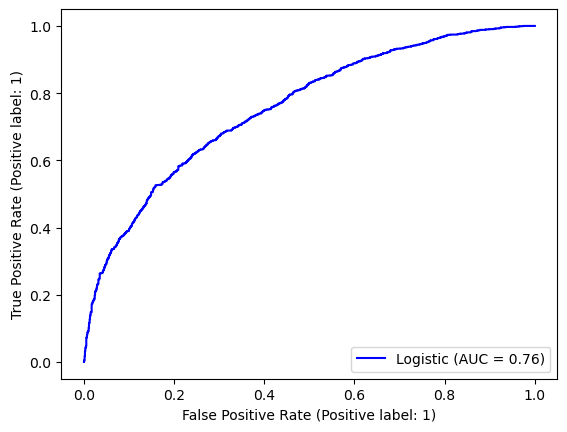

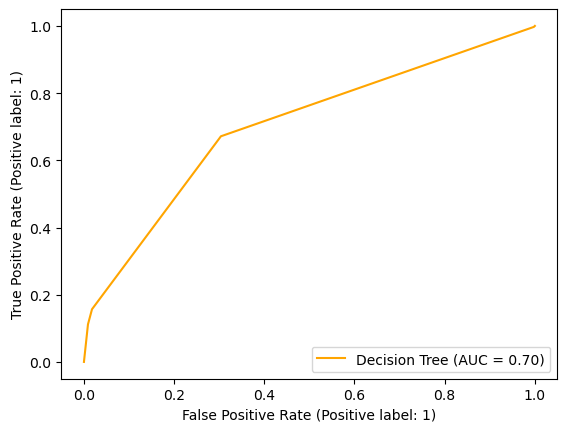

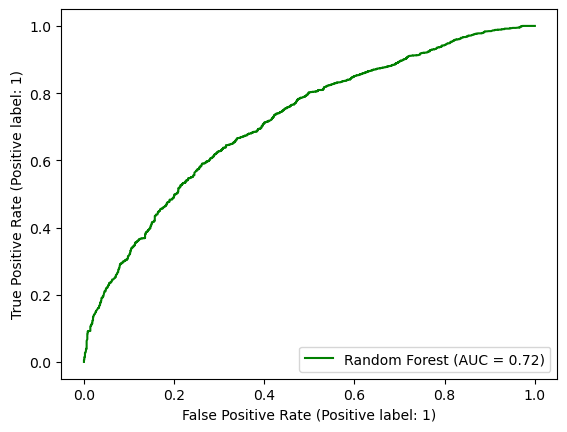

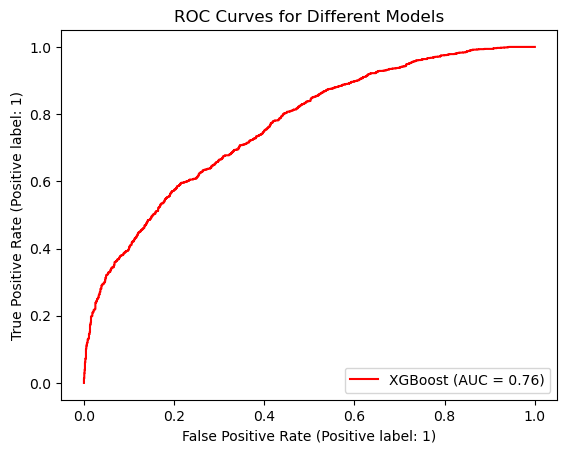

In [ ]:
### Standardize for Logistic Regression (Optional but recommended) ###
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Store results for comparison ###
results = {}

### 1. Logistic Regression ###
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:,1]

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_log),
    'Precision': precision_score(y_test, y_pred_log),
    'Recall': recall_score(y_test, y_pred_log),
    'F1': f1_score(y_test, y_pred_log),
    'ROC-AUC': roc_auc_score(y_test, y_prob_log)
}

### 2. Shallow Decision Tree ###
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
y_prob_tree = tree.predict_proba(X_test)[:,1]

results['Decision Tree (max_depth=3)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_tree),
    'Precision': precision_score(y_test, y_pred_tree),
    'Recall': recall_score(y_test, y_pred_tree),
    'F1': f1_score(y_test, y_pred_tree),
    'ROC-AUC': roc_auc_score(y_test, y_prob_tree)
}

### 3. Random Forest ###
rf = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test)[:,1]

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_prob_rf)
}

### 4. XGBoost ###
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_prob_xgb)
}

### Results Table ###
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n")
print(results_df)

### ROC Curves Plot ###
plt.figure(figsize=(8,6))
RocCurveDisplay.from_predictions(y_test, y_prob_log, name="Logistic", color='blue')
RocCurveDisplay.from_predictions(y_test, y_prob_tree, name="Decision Tree", color='orange')
RocCurveDisplay.from_predictions(y_test, y_prob_rf, name="Random Forest", color='green')
RocCurveDisplay.from_predictions(y_test, y_prob_xgb, name="XGBoost", color='red')
plt.title("ROC Curves for Different Models")
plt.show()

### Model comparison

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.681599   0.680959  0.689985  0.685443  0.757359
Decision Tree        0.683821   0.690909  0.671576  0.681105  0.701354
Random Forest        0.673454   0.673977  0.678940  0.676449  0.675088
XGBoost              0.683080   0.676512  0.708395  0.692086  0.767387


<Figure size 800x600 with 0 Axes>

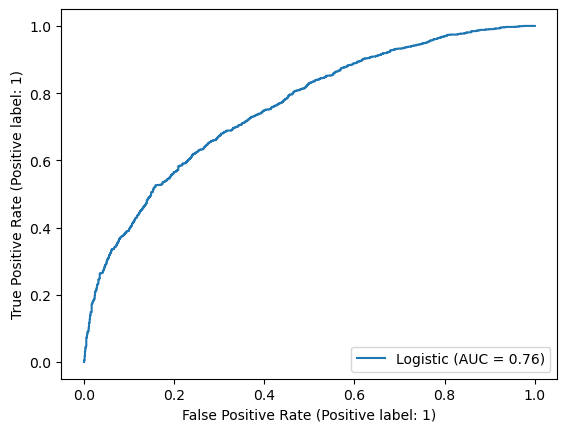

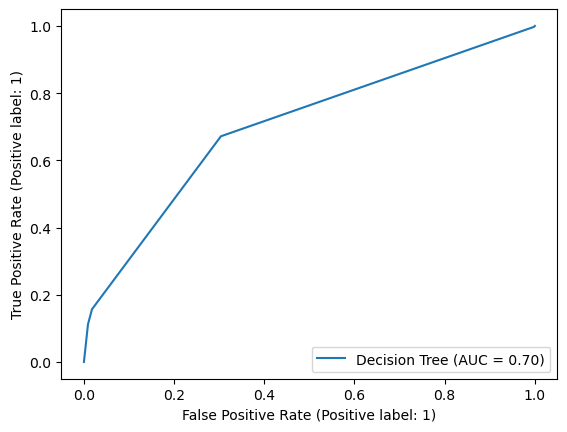

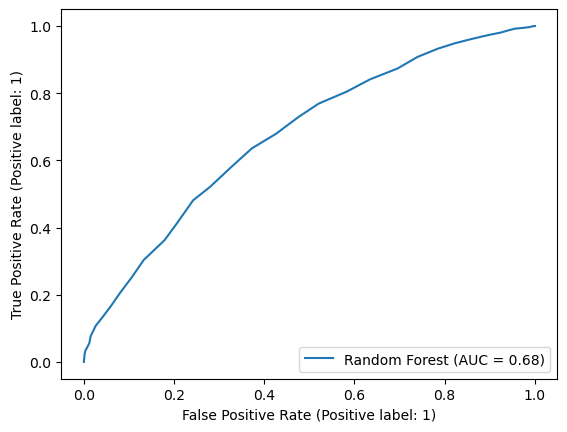

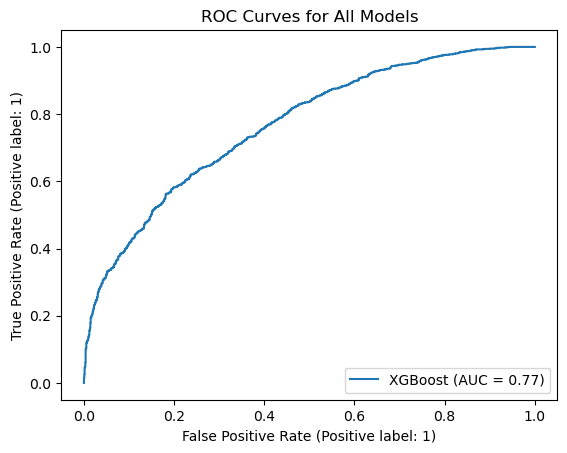

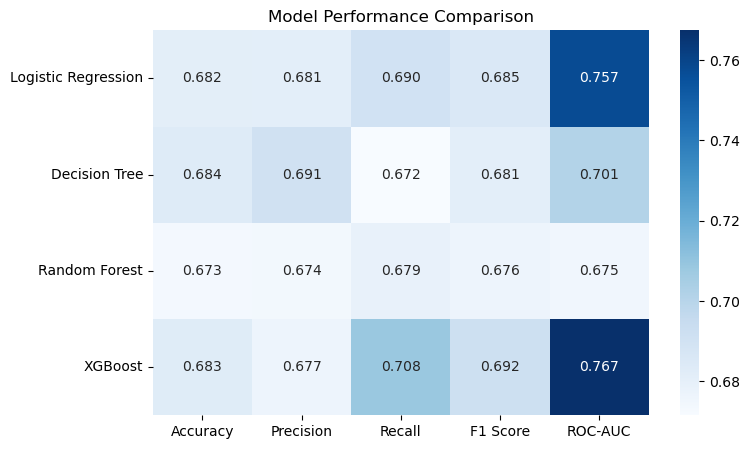

In [15]:
# Optional standardization for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}
models = {}

### Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:,1]

results['Logistic Regression'] = [
    accuracy_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_log),
    recall_score(y_test, y_pred_log),
    f1_score(y_test, y_pred_log),
    roc_auc_score(y_test, y_prob_log)
]
models['Logistic'] = (y_test, y_prob_log)

### Decision Tree (Shallow)
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
y_prob_tree = tree.predict_proba(X_test)[:,1]

results['Decision Tree'] = [
    accuracy_score(y_test, y_pred_tree),
    precision_score(y_test, y_pred_tree),
    recall_score(y_test, y_pred_tree),
    f1_score(y_test, y_pred_tree),
    roc_auc_score(y_test, y_prob_tree)
]
models['Decision Tree'] = (y_test, y_prob_tree)

### Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test)[:,1]

results['Random Forest'] = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf),
    roc_auc_score(y_test, y_prob_rf)
]
models['Random Forest'] = (y_test, y_prob_rf)

### XGBoost
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    
    # Key hyperparameters to tune:
    n_estimators=1000,        # Number of trees, try [100, 200, 300, 500]
    max_depth=4,             # Tree depth, try [3, 4, 5, 6]
    learning_rate=0.01,      # Learning rate (shrinkage), try [0.01, 0.05, 0.1]
    subsample=0.8,           # Row subsampling, try [0.6, 0.8, 1.0]
    colsample_bytree=0.8,    # Feature subsampling, try [0.6, 0.8, 1.0]
    min_child_weight=1,      # Minimum sum of instance weight needed in a child, try [1, 3, 5]
    gamma=0,                 # Minimum loss reduction to make a split, try [0, 0.1, 0.2]
    reg_alpha=0,             # L1 regularization, try [0, 0.1, 1]
    reg_lambda=1             # L2 regularization, try [0.5, 1, 2]
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

results['XGBoost'] = [
    accuracy_score(y_test, y_pred_xgb),
    precision_score(y_test, y_pred_xgb),
    recall_score(y_test, y_pred_xgb),
    f1_score(y_test, y_pred_xgb),
    roc_auc_score(y_test, y_prob_xgb)
]
models['XGBoost'] = (y_test, y_prob_xgb)

# Convert to DataFrame for display
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']).T
print(results_df)

### Plot ROC Curves
plt.figure(figsize=(8,6))
for name, (y_true, y_prob) in models.items():
    RocCurveDisplay.from_predictions(y_true, y_prob, name=name)
plt.title('ROC Curves for All Models')
plt.show()

### Heatmap of Metrics
plt.figure(figsize=(8,5))
sns.heatmap(results_df, annot=True, fmt=".3f", cmap='Blues')
plt.title('Model Performance Comparison')
plt.show()


Accuracy: 0.686
Precision: 0.679
Recall: 0.714
F1 Score: 0.696
ROC-AUC: 0.765


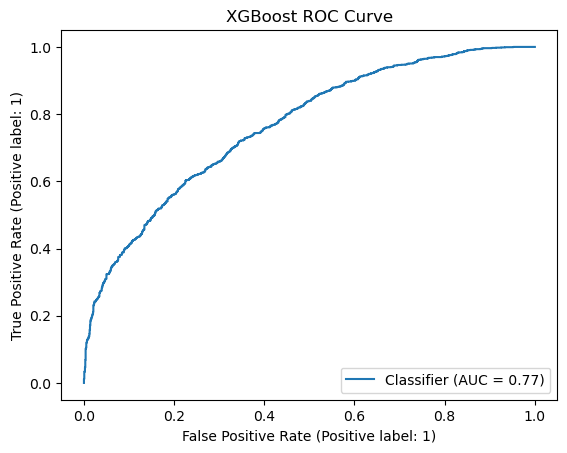

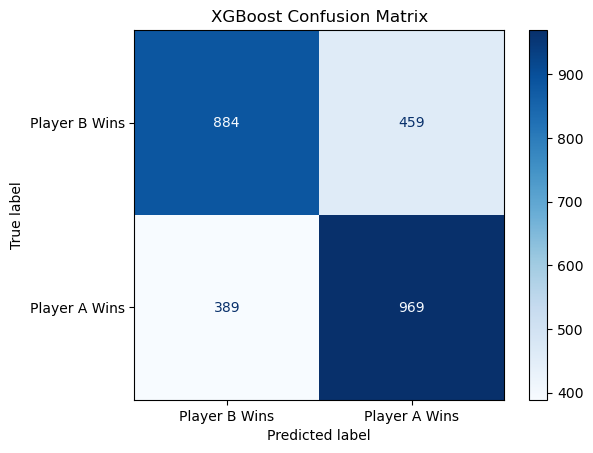

In [80]:
# Define the XGBoost model with suggested starting parameters
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=600,
    max_depth=8,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:,1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

# Plot ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("XGBoost ROC Curve")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Player B Wins", "Player A Wins"])
disp.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

### Trying a neural network


Neural Network Performance:
Accuracy:  0.635
Precision: 0.627
Recall:    0.677
F1 Score:  0.651
ROC-AUC:   0.696


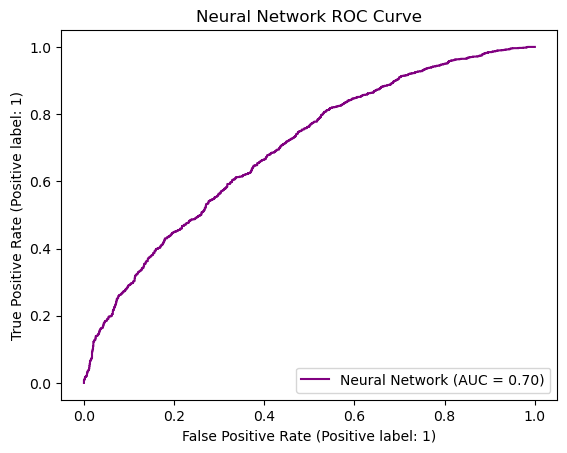

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming:
# df_model prepared, 'target' is the label
# X_train, X_test, y_train, y_test ready from your previous code

# Neural Networks benefit from standardized inputs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32),  # Two hidden layers
                         activation='relu',
                         solver='adam',
                         max_iter=500,
                         random_state=42)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_nn = nn_model.predict(X_test_scaled)
y_prob_nn = nn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)
roc_auc = roc_auc_score(y_test, y_prob_nn)

print("\nNeural Network Performance:")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}")

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob_nn, name='Neural Network', color='purple')
plt.title("Neural Network ROC Curve")
plt.show()


## Estimating the ROI of using our predictions

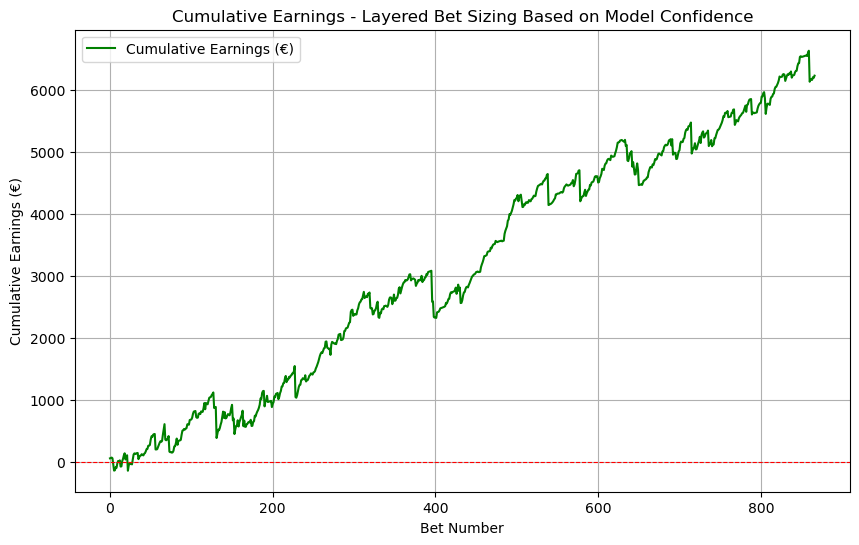

Total Bets Placed: 867
Total Amount Invested: €143330.00
Final Net Earnings: €6231.30
ROI: 4.35%


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Rebuild test set with essential columns
df_raw_test = df.loc[X_test.index].copy()
df_raw_test['y_test'] = y_test
df_raw_test['y_prob'] = y_prob_xgb  # Replace with your model's predicted probabilities

# Clean odds columns and filter only valid rows
for col in ['P_A_B365', 'P_B_B365']:
    df_raw_test[col] = pd.to_numeric(df_raw_test[col], errors='coerce')
    df_raw_test[col] = df_raw_test[col].where(df_raw_test[col] > 1, np.nan)

# Keep only rows with valid odds for both players
df_valid_bets = df_raw_test.dropna(subset=['P_A_B365', 'P_B_B365', 'y_prob', 'y_test', 'Date']).copy()

# Sort chronologically
df_valid_bets = df_valid_bets.sort_values(by='Date').reset_index(drop=True)

# bet_amount = 100  # Base bet
earnings = []
total_earnings = 0
total_bets = 0
total_invested = 0

for _, row in df_valid_bets.iterrows():
    pred_prob = row['y_prob']
    actual_result = row['y_test']
    
    # Bet only if model confidence exceeds 60%
    if pred_prob < 0.6 or pred_prob > 0.4 and pred_prob < 0.5:
        continue  # Skip match, no bet placed

    # Determine bet side
    if pred_prob >= 0.5:
        odds = row['P_A_B365']
        bet_on_a = True
    else:
        odds = row['P_B_B365']
        bet_on_a = False

    # Bet sizing based on confidence
    if pred_prob < 0.7:
        bet_size = 10
    elif pred_prob < 0.8:
        bet_size = 100
    elif pred_prob < 0.9:
        bet_size = 250
    else:
        bet_size = 500

    total_bets += 1
    total_invested += bet_size

    if (bet_on_a and actual_result == 1) or (not bet_on_a and actual_result == 0):
        profit = bet_size * (odds - 1)
    else:
        profit = -bet_size

    total_earnings += profit
    earnings.append(total_earnings)

# Plot
if total_bets == 0:
    print("No bets placed (model never exceeded confidence thresholds).")
else:
    plt.figure(figsize=(10, 6))
    plt.plot(range(total_bets), earnings, label='Cumulative Earnings (€)', color='green')
    plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
    plt.title('Cumulative Earnings - Layered Bet Sizing Based on Model Confidence')
    plt.xlabel('Bet Number')
    plt.ylabel('Cumulative Earnings (€)')
    plt.grid(True)
    plt.legend()
    plt.show()

    roi = (total_earnings / total_invested) * 100

    print(f'Total Bets Placed: {total_bets}')
    print(f'Total Amount Invested: €{total_invested:.2f}')
    print(f'Final Net Earnings: €{total_earnings:.2f}')
    print(f'ROI: {roi:.2f}%')


## Feature Importance Plot & SHAP Values

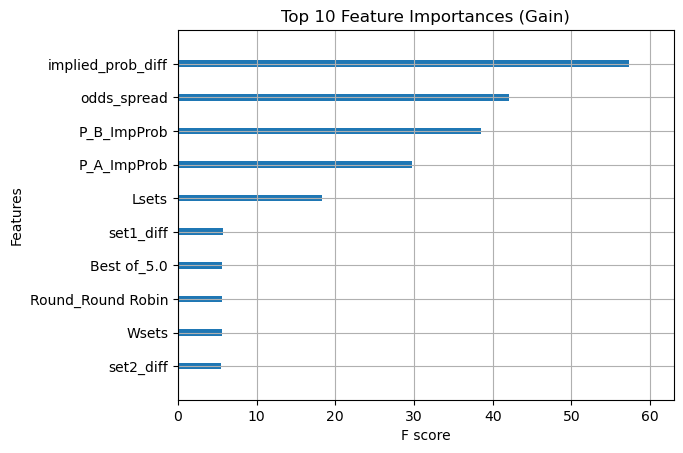

In [90]:
ax = xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (Gain)")

# Loop to remove text labels on bars
for patch in ax.patches:
    patch.set_label('')  # Disable label if set, precaution

# Remove text annotations manually
for txt in ax.texts:
    txt.set_text('')

plt.show()


In [89]:
import shap

# Explain model predictions using SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Summary plot (global feature impact)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Full beeswarm plot (shows distribution and direction of feature effects)
shap.summary_plot(shap_values, X_test)

ImportError: Numba needs NumPy 1.24 or less